# Precipitation Extremes Analysis

### Start a dask distributed cluster

In [1]:
from ncar_jobqueue import NCARCluster
from dask.distributed import Client
import dask

In [2]:
#cluster = NCARCluster(project='P54048000') #maria's PC
cluster = NCARCluster(project='p06010014')

The cluster can be set using ``scale``. Another option is to set it with an adaptable scale using ``adapt``. Here I am allowing dask to call for additional workers, up to 40, as needed for follow-up analysis. When the workers are not needed, dask will return them and we won't be consuming resources when not needed.

In [3]:
#cluster.adapt(minimum=5, maximum=40, wait_count=60) 
cluster.scale(5)

In [4]:
client = Client(cluster)

In [5]:
dask.config.set({'distributed.dashboard.link': "/proxy/{port}/status"});

In [6]:
client

Client Scheduler: tcp://10.148.10.17:40825 Dashboard: /proxy/8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


### Load the file as an xarray dataset with dask enabled

In [7]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [8]:
#file_path = "/glade/scratch/nanr/forKatie/daily/"
file_path = "/glade/scratch/jet/katie/daily/"

In [9]:
var = "PRECT"

In [10]:
# ens002, historical
file = "b.e13.B20TRC5CN.ne120_g16.002.cam.h1.PRECT.19600101-20051231.regrid.23x0.31.nc"
# ens001, RCP8.5
#file = "b.e13.BRCP85C5CN.ne120_g16.001.cam.h1.PRECT.20700101-21001231.regrid.23x0.31.nc"
# ens002, RCP8.5 needs to be concatenated - separate files for each year
# ens 003, RCP8.5
#file = "b.e13.BRCP85C5CN.ne120_g16.003.cam.h1.PRECT.20700101-21001231.regrid.23x0.31.nc"

In [11]:
ds = xr.open_dataset(file_path+file, chunks={'time': 100, 'lat': 384, 'lon': 576})

In [12]:
ds

<xarray.Dataset>
Dimensions:       (ilev: 31, lat: 768, lev: 30, lon: 1152, nbnd: 2, slat: 767, slon: 1152, time: 16790)
Coordinates:
  * lat           (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.53 89.77 90.0
  * lon           (lon) float64 0.0 0.3125 0.625 0.9375 ... 359.1 359.4 359.7
  * slat          (slat) float64 -89.88 -89.65 -89.41 ... 89.41 89.65 89.88
  * slon          (slon) float64 0.0 0.1562 0.4688 0.7812 ... 358.9 359.2 359.5
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * time          (time) object 1960-01-02 00:00:00 ... 2006-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    w_stag        (slat) float64 dask.array<chunksize=(767,), meta=np.ndarray>
    lat_bnds      (lat, nbnd) float64 dask.array<chunksize=(384, 2), meta=np.ndarray>
    lon_bnds      (lon, nbnd) float64 dask.array<chunksize=(576, 2), meta=np.ndarray>
    gw            (lat) float64 dask.array<chunksize=(384,), meta=np.ndarray>
    area          (lat, lon) float64 dask.array<chunksize=(384, 576), meta=np.ndarray>
    P0            float64 ...
    PRECT         (time, lat, lon) float32 dask.array<chunksize=(100, 384, 576), meta=np.ndarray>
    ch4vmr        (time) float64 dask.array<chunksize=(100,), meta=np.ndarray>
    co2vmr        (time) float64 dask.array<chunksize=(100,), meta=np.ndarray>
    date          (time) int32 dask.array<chunksize=(100,), meta=np.ndarray>
    date_written  (time) |S8 dask.array<chunksize=(100,), meta=np.ndarray>
    datesec       (time) int32 dask.array<chunksize=(100,), meta=np.ndarray>
    f11vmr        (time) float64 dask.array<chunksize=(100,), meta=np.ndarray>
    f12vmr        (time) float64 dask.array<chunksize=(100,), meta=np.ndarray>
    hyai          (ilev) float64 dask.array<chunksize=(31,), meta=np.ndarray>
    hyam          (lev) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    hybi          (ilev) float64 dask.array<chunksize=(31,), meta=np.ndarray>
    hybm          (lev) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    mdt           int32 ...
    n2ovmr        (time) float64 dask.array<chunksize=(100,), meta=np.ndarray>
    nbdate        int32 ...
    nbsec         int32 ...
    ndbase        int32 ...
    ndcur         (time) int32 dask.array<chunksize=(100,), meta=np.ndarray>
    nsbase        int32 ...
    nscur         (time) int32 dask.array<chunksize=(100,), meta=np.ndarray>
    nsteph        (time) int32 dask.array<chunksize=(100,), meta=np.ndarray>
    ntrk          int32 ...
    ntrm          int32 ...
    ntrn          int32 ...
    sol_tsi       (time) float64 dask.array<chunksize=(100,), meta=np.ndarray>
    time_bnds     (time, nbnd) object dask.array<chunksize=(100, 2), meta=np.ndarray>
    time_written  (time) |S8 dask.array<chunksize=(100,), meta=np.ndarray>
Attributes:
    np:               4
    ne:               120
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e13.B20TRC5CN.ne120_g16.002
    title:            UNSET
    logname:          
    host:             
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     /projects/ccsm/inputdata/atm/cam/inic/homme/cami-mam3_0...
    topography_file:  /projects/ccsm/inputdata/atm/cam/topo/USGS-gtopo30_ne12...
    history:          Wed Mar 25 15:04:09 2020: ncks -O -t 2 --no_tmp_fl --ga...
    remap_script:     ncremap
    remap_command:    '/glade/u/apps/dav/opt/nco/4.7.9/gnu/8.3.0/bin/ncremap ...
    remap_hostname:   casper12
    remap_version:    4.7.9
    NCO:              netCDF Operators version 4.7.9 (Homepage = http://nco.s...
    map_file:         /glade/work/nanr/mapfiles/map_ne120_to_0.23x0.31_biline...
    input_file:       ./b.e13.B20TRC5CN.ne120_g16.002.cam.h1.PRECT.19600101-2...

### Read variable as a data array

In [13]:
PRECT = ds.PRECT # can I use the variable "var" somehow here to select the desired output variable?
PRECT

<xarray.DataArray 'PRECT' (time: 16790, lat: 768, lon: 1152)>
dask.array<open_dataset-409f479ddf09786461ef525605f0d22fPRECT, shape=(16790, 768, 1152), dtype=float32, chunksize=(100, 384, 576)>
Coordinates:
  * lat      (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * lon      (lon) float64 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7
  * time     (time) object 1960-01-02 00:00:00 ... 2006-01-01 00:00:00
Attributes:
    units:          m/s
    long_name:      Total (convective and large-scale) precipitation rate (li...
    cell_methods:   time: mean
    cell_measures:  area: area

### Look at the array and chunk sizes

In [14]:
PRECT.data

,Array,Chunk
Bytes,59.42 GB,88.47 MB
Shape,"(16790, 768, 1152)","(100, 384, 576)"
Count,673 Tasks,672 Chunks
Type,float32,numpy.ndarray


### Read the variable into memory before computations and plotting

Use the progress bar to track time

In [15]:
from dask.diagnostics import ProgressBar

In [16]:
# progress bar isn't showing up anymore?
with ProgressBar():
    PRECT = PRECT.persist()

In [17]:
# To get timing, can also use:
#%time PRECT = PRECT.persist()

### Compute annual mean and plot

In [107]:
# This is fast now because it's a dask array
%time PRECT_amean = PRECT.mean(dim='time')
#PRECT_amean
PRECT_amean.data

CPU times: user 5.65 ms, sys: 28 µs, total: 5.68 ms
Wall time: 5.62 ms


dask.array<mean_agg-aggregate, shape=(768, 1152), dtype=float32, chunksize=(384, 576)>

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.29 µs


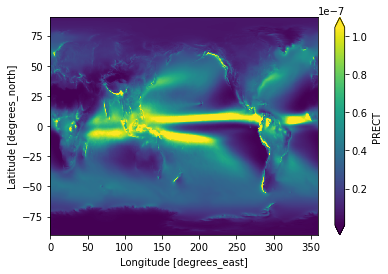

In [19]:
%time
PRECT_amean.plot(robust=True);

### Compute seasonal mean and plot

In [75]:
%time PRECT_smean = PRECT.groupby('time.season').mean('time')
PRECT_smean.data

CPU times: user 48.9 ms, sys: 0 ns, total: 48.9 ms
Wall time: 47.7 ms


dask.array<stack, shape=(4, 768, 1152), dtype=float32, chunksize=(1, 384, 576)>

Text(0.5, 1.02, 'Seasonal Mean')

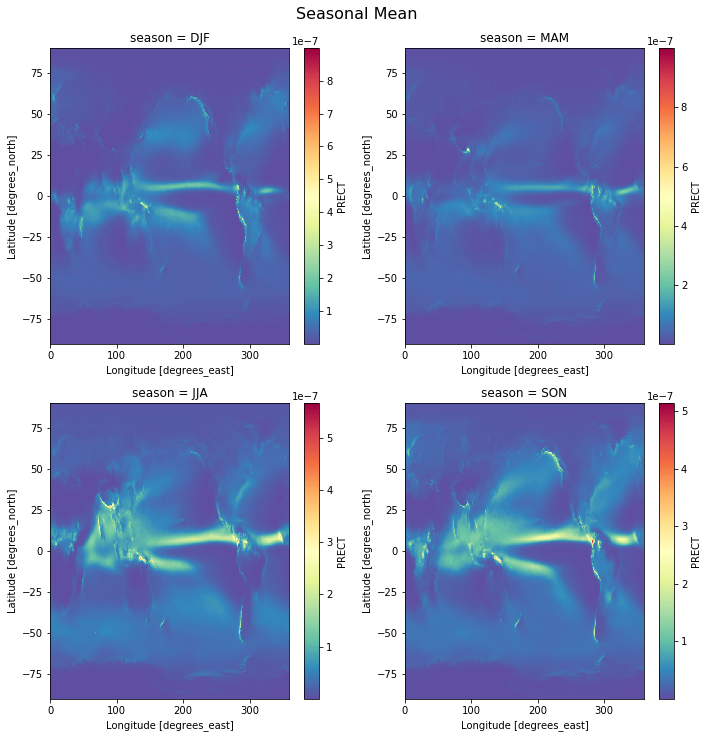

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

PRECT_smean.sel(season='DJF').plot(
        ax=axes[0, 0], cmap='Spectral_r')

PRECT_smean.sel(season='MAM').plot(
        ax=axes[0, 1], cmap='Spectral_r')

PRECT_smean.sel(season='JJA').plot(
        ax=axes[1, 0], cmap='Spectral_r')

PRECT_smean.sel(season='SON').plot(
        ax=axes[1, 1], cmap='Spectral_r')

plt.tight_layout()

fig.suptitle('Seasonal Mean', fontsize=16, y=1.02)

### Creating a landmask for the data.

Imports.

In [36]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import shapely.geometry as sgeom
from shapely.ops import unary_union
from shapely.prepared import prep

Load cartopy shapefile data.

In [37]:
land_shp_fname = shpreader.natural_earth(resolution='50m', category='physical', name='land')
land_geom = unary_union(list(shpreader.Reader(land_shp_fname).geometries()))
land = prep(land_geom)
def is_land(x, y):
    return land.contains(sgeom.Point(x, y))

Create new array with longitudes from 0-360 to 0-180 degrees.

In [108]:
PRECT_amean['_lon_new'] = xr.where(PRECT_amean['lon'] > 180, PRECT_amean['lon'] - 360, PRECT_amean['lon'])

Create an empty data array that matches data domain.

In [109]:
themask=np.zeros(PRECT_amean.shape)

Create coordinate matrices from coordinate vectors.

In [110]:
x, y = np.meshgrid(PRECT_amean._lon_new.values, PRECT_amean.lat.values)

Loop through checking whether the points are over land or not.

In [111]:
from itertools import product
for i, j in product(range(0,themask.shape[0]), range(0,themask.shape[1])):
    if is_land(x[i,j], y[i,j]):
        themask[i,j]=1.

Here is how you plot using the landmask.

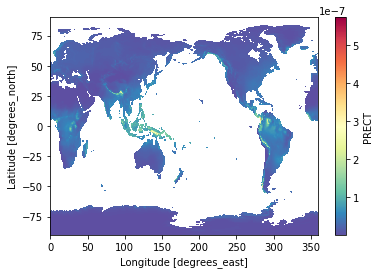

In [113]:
PRECT_amean.where(themask>0).plot(cmap='Spectral_r'); plt.show()

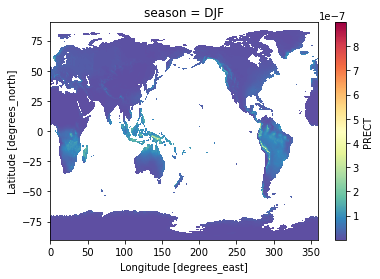

In [112]:
PRECT_smean.sel(season='DJF').where(themask>0).plot(cmap='Spectral_r'); plt.show()

### Try using CDO within python

In [20]:
import cdo
cdo.__file__

'/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/cdo.py'

In [21]:
cdo.Cdo()

FileNotFoundError: [Errno 2] No such file or directory: 'cdo': 'cdo'

In [22]:
from cdo import *
cdo = Cdo()

FileNotFoundError: [Errno 2] No such file or directory: 'cdo': 'cdo'

Can try to follow this example for using CDO indices\
https://github.com/Peter-Gibson/climate/blob/CLIMATE-937/examples/ETCCDI_precip.py

Assign outputfile name

In [34]:
base_name = "b.e13.B20TRC5CN.ne120_g16.002.cam.h1.PRECT.19600101-20051231.regrid.23x0.31"

In [35]:
# convert to mm/day
PRECT_mm = PRECT*1000*86400

Here we use the yearmax function to calculate consecutive days ('consects') with less than ('lec') 1 mm precip

I don't yet know what "options=-L" does

In [36]:
help(cdo.yearmax)

AttributeError: module 'cdo' has no attribute 'yearmax'

In [28]:
cdo.yearmax(input='-consects -lec,1 '+ PRECT_mm, output=base_name+'_'+'cdd.nc', options='-L')

TypeError: can only concatenate str (not "Array") to str

### Subset data for CONUS

In [22]:
# http://en.wikipedia.org/wiki/Extreme_points_of_the_United_States#Westernmost
top = 49.3457868 # north lat
left = -124.7844079 # west long
right = -66.9513812 # east long
bottom =  24.7433195 # south lat

TO DO: how to subset land points only within this domain? Need a CAM landmask for this resolution (regridded...)

In [23]:
# Accounting for longitude conversion from -180,180 to 0,360
PRECT_CONUS = PRECT.sel(lat=slice(bottom,top),lon=slice(360+left,360+right))

In [24]:
PRECT_CONUS

<xarray.DataArray 'PRECT' (time: 16790, lat: 105, lon: 185)>
dask.array<getitem, shape=(16790, 105, 185), dtype=float32, chunksize=(100, 105, 185)>
Coordinates:
  * lat      (lat) float64 24.76 24.99 25.23 25.46 ... 48.46 48.7 48.93 49.17
  * lon      (lon) float64 235.3 235.6 235.9 236.2 ... 291.9 292.2 292.5 292.8
  * time     (time) object 1960-01-02 00:00:00 ... 2006-01-01 00:00:00
Attributes:
    units:          m/s
    long_name:      Total (convective and large-scale) precipitation rate (li...
    cell_methods:   time: mean
    cell_measures:  area: area

In [25]:
PRECT_CONUS.data

,Array,Chunk
Bytes,1.30 GB,7.77 MB
Shape,"(16790, 105, 185)","(100, 105, 185)"
Count,840 Tasks,168 Chunks
Type,float32,numpy.ndarray


### Mask out where precip < 1 mm/day
or < 1/(1000*86400) m/s

In [26]:
p_dry = 1/(1000*86400) # m/s

In [27]:
p_dry

1.1574074074074074e-08

In [28]:
PRECT_CONUS_mask = PRECT_CONUS.where(PRECT_CONUS >= p_dry)

In [29]:
PRECT_CONUS_mask

<xarray.DataArray 'PRECT' (time: 16790, lat: 105, lon: 185)>
dask.array<where, shape=(16790, 105, 185), dtype=float32, chunksize=(100, 105, 185)>
Coordinates:
  * lat      (lat) float64 24.76 24.99 25.23 25.46 ... 48.46 48.7 48.93 49.17
  * lon      (lon) float64 235.3 235.6 235.9 236.2 ... 291.9 292.2 292.5 292.8
  * time     (time) object 1960-01-02 00:00:00 ... 2006-01-01 00:00:00
Attributes:
    units:          m/s
    long_name:      Total (convective and large-scale) precipitation rate (li...
    cell_methods:   time: mean
    cell_measures:  area: area

In [30]:
time0_mask = PRECT_CONUS_mask[0,:,:]

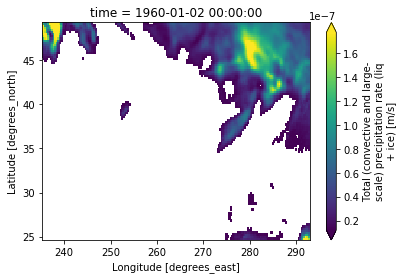

In [31]:
time0_mask.plot(robust=True)

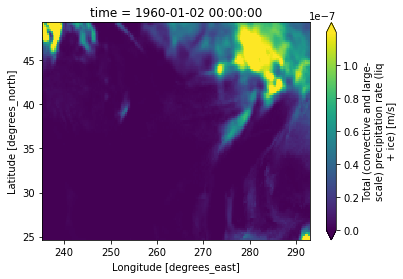

In [32]:
# without dry points masked out
time0 = PRECT_CONUS[0,:,:]
time0.plot(robust=True);

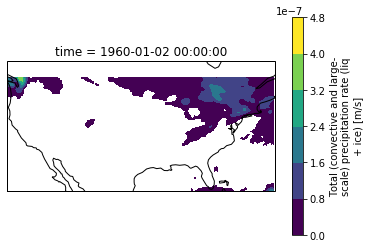

In [33]:
import cartopy.crs as ccrs
ax = plt.axes(projection=ccrs.PlateCarree())
PRECT_CONUS_mask.isel(time=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_extent([360+left,360+right,bottom,top])
ax.coastlines();

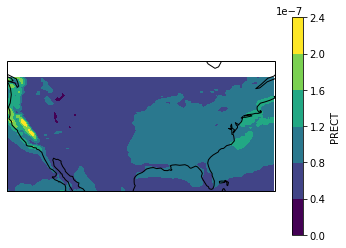

In [34]:
ax = plt.axes(projection=ccrs.PlateCarree())
PRECT_CONUS_mask.mean(dim='time').plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_extent([360+left,360+right,bottom,top])
ax.coastlines();
# This shows all points have at least some data (i.e., no gridpoint is masked for all time points)

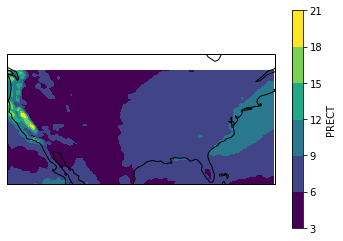

In [35]:
# convert to mm/day
PRECT_CONUS_mask_mm = PRECT_CONUS_mask*1000*86400
ax = plt.axes(projection=ccrs.PlateCarree())
PRECT_CONUS_mask_mm.mean(dim='time').plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_extent([360+left,360+right,bottom,top])
ax.coastlines();

### Compute the 90th percentile for each gridpoint including only non-dry days

TO DO: seasonal quantiles?

In [51]:
# Here we have to use compute since quantile doesn't operate on dask arrays (?)
# But it is still relatively fast
%time
p90 = PRECT_CONUS_mask_mm.compute().quantile(0.9, dim='time')

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


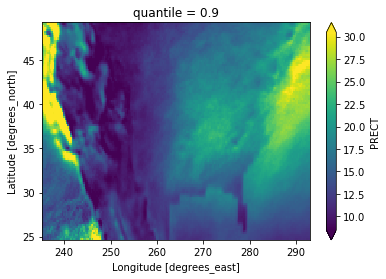

In [58]:
p90.plot(robust=True);

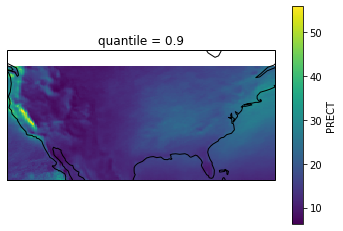

In [59]:
ax = plt.axes(projection=ccrs.PlateCarree())
p90.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree());
#p90.plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_extent([360+left,360+right,bottom,top])
ax.coastlines();

Close client/cluser and release workers when you're done

In [29]:
client.close()
cluster.close()